In [1]:
import pandas as pd
import os

# depending on the OS the path to the data file is different
if os.name == 'nt':
    data = pd.read_excel(r'data\nutrient-file-release2-jan22.xlsx', sheet_name='All solids & liquids per 100g')
elif os.name == 'posix':
    data = pd.read_excel(r'../data/nutrient-file-release2-jan22.xlsx', sheet_name='All solids & liquids per 100g')

## $k$-NN

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# split data into train and test sets
train, test = train_test_split(data, test_size=0.2)

In [3]:
# use nutrition columns as features
X_COLS = list(data.columns[3:])

# use classification column as target
y_COL = data.columns[1]

print(f"X_COLS: {X_COLS}")
print(f"y_COL: {y_COL}")

X_COLS: ['Energy with dietary fibre, equated \n(kJ)', 'Energy, without dietary fibre, equated \n(kJ)', 'Moisture (water) \n(g)', 'Protein \n(g)', 'Nitrogen \n(g)', 'Fat, total \n(g)', 'Ash \n(g)', 'Total dietary fibre \n(g)', 'Alcohol \n(g)', 'Fructose \n(g)', 'Glucose \n(g)', 'Sucrose\n(g)', 'Maltose \n(g)', 'Lactose \n(g)', 'Galactose \n(g)', 'Maltotrios \n(g)', 'Total sugars (g)', 'Added sugars (g)', 'Free sugars \n(g)', 'Starch \n(g)', 'Dextrin \n(g)', 'Glycerol \n(g)', 'Glycogen \n(g)', 'Inulin \n(g)', 'Erythritol \n(g)', 'Maltitol \n(g)', 'Mannitol \n(g)', 'Xylitol \n(g)', 'Maltodextrin (g)', 'Oligosaccharides  \n(g)', 'Polydextrose \n(g)', 'Raffinose \n(g)', 'Stachyose \n(g)', 'Sorbitol \n(g)', 'Resistant starch \n(g)', 'Available carbohydrate, without sugar alcohols \n(g)', 'Available carbohydrate, with sugar alcohols \n(g)', 'Acetic acid \n(g)', 'Citric acid \n(g)', 'Fumaric acid \n(g)', 'Lactic acid \n(g)', 'Malic acid\n (g)', 'Oxalic acid \n(g)', 'Propionic acid \n(g)', 'Qui

In [4]:
# create design matrix X and predictions y
X_train = train[X_COLS]
y_train = train[y_COL]
X_test = test[X_COLS]
y_test = test[y_COL]

# sample some rows of training set and their labels
print(f"X_train: {X_train.head()}")
print("Labels:", y_train.iloc[:5].reset_index(drop=True).values)

# sample some rows of test set and their labels
print(f"X_test: {X_test.head()}")
print("Labels:", y_test.iloc[:5].reset_index(drop=True).values)

X_train:       Energy with dietary fibre, equated \n(kJ)   
1480                                        842  \
963                                         661   
306                                        1466   
818                                         793   
792                                         746   

      Energy, without dietary fibre, equated \n(kJ)  Moisture (water) \n(g)   
1480                                            624                    35.3  \
963                                             661                    65.2   
306                                            1462                    11.5   
818                                             793                    60.5   
792                                             746                    60.6   

      Protein \n(g)  Nitrogen \n(g)  Fat, total \n(g)  Ash \n(g)   
1480            9.8            1.57               4.5        2.2  \
963            31.3            5.00               3.5        1.1   
306  

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# create knn with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# replace NaN values with 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)

# train the model using the training set
knn.fit(X_train, y_train)

/var/folders/lh/zkgkhqb15kzgylp6c57ssn1r0000gn/T/ipykernel_64337/2454431819.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(0, inplace=True)
/var/folders/lh/zkgkhqb15kzgylp6c57ssn1r0000gn/T/ipykernel_64337/2454431819.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(0, inplace=True)


KNeighborsClassifier(n_neighbors=3)

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# predict the labels of the test set
y_pred = knn.predict(X_test)

# print the predictions
print(f"First 5 predictions: {y_pred[:5]}")

First 5 predictions: [16103. 24301. 14402. 16802. 12201.]


In [7]:
# check the accuracy
from sklearn.metrics import accuracy_score

# y_test constains the true labels of the test set
# y_pred contains the predicted labels of the test set
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.46296296296296297


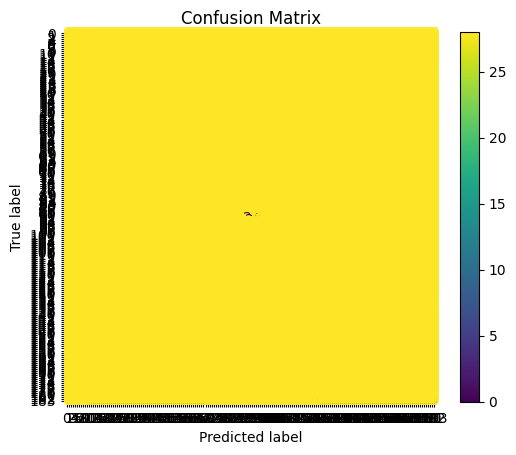

In [8]:
# show confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# plot confusion matrix
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Linear Regression

In [9]:
import random
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
train, test = train_test_split(data, test_size=0.2)

# sample some rows of training set
X_train.sample(10)

,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),Total dietary fibre \n(g),Alcohol \n(g),Fructose \n(g),...,Leucine \n(mg),Lysine \n(mg),Methionine \n(mg),Phenylalanine \n(mg),Proline \n(mg),Serine \n(mg),Threonine \n(mg),Tyrosine \n(mg),Tryptophan \n(mg),Valine \n(mg)
1069,1104,1095,48.4,13.1,2.09,15.8,3.0,1.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131,0.0
862,773,773,62.0,31.3,5.01,6.5,1.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,274,0.0
1331,2097,2068,2.3,6.8,1.08,32.6,5.3,3.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30,0.0
1274,820,816,55.0,12.2,1.96,7.0,1.9,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,137,0.0
727,731,731,67.7,21.3,3.42,10.0,1.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173,0.0
1095,782,782,66.4,18.6,2.97,12.6,1.3,0.0,0.0,0.0,...,1466.0,1502.0,532.0,845.0,767.0,821.0,964.0,625.0,235,946.0
1378,1283,1254,17.0,5.7,0.78,0.8,3.8,3.5,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57,0.0
316,1464,1444,12.8,11.7,2.06,1.7,0.6,2.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,152,0.0
1032,568,568,72.2,24.8,3.97,4.0,1.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,290,0.0
1586,100,95,92.5,2.6,0.42,0.2,0.8,0.6,0.0,1.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29,0.0


In [11]:
X_COLS = list(data.columns[5:])
y_COL = data.columns[4]

print(f"X_COLS: {X_COLS}")
print(f"y_COL: {y_COL}")

# create design matrix X and predictions y
X_train = train[X_COLS]
y_train = train[y_COL]
X_test = test[X_COLS]
y_test = test[y_COL]

# sample some rows of training set and their labels
X_train.head()
y_train.head()

X_COLS: ['Moisture (water) \n(g)', 'Protein \n(g)', 'Nitrogen \n(g)', 'Fat, total \n(g)', 'Ash \n(g)', 'Total dietary fibre \n(g)', 'Alcohol \n(g)', 'Fructose \n(g)', 'Glucose \n(g)', 'Sucrose\n(g)', 'Maltose \n(g)', 'Lactose \n(g)', 'Galactose \n(g)', 'Maltotrios \n(g)', 'Total sugars (g)', 'Added sugars (g)', 'Free sugars \n(g)', 'Starch \n(g)', 'Dextrin \n(g)', 'Glycerol \n(g)', 'Glycogen \n(g)', 'Inulin \n(g)', 'Erythritol \n(g)', 'Maltitol \n(g)', 'Mannitol \n(g)', 'Xylitol \n(g)', 'Maltodextrin (g)', 'Oligosaccharides  \n(g)', 'Polydextrose \n(g)', 'Raffinose \n(g)', 'Stachyose \n(g)', 'Sorbitol \n(g)', 'Resistant starch \n(g)', 'Available carbohydrate, without sugar alcohols \n(g)', 'Available carbohydrate, with sugar alcohols \n(g)', 'Acetic acid \n(g)', 'Citric acid \n(g)', 'Fumaric acid \n(g)', 'Lactic acid \n(g)', 'Malic acid\n (g)', 'Oxalic acid \n(g)', 'Propionic acid \n(g)', 'Quinic acid \n(g)', 'Shikimic acid \n(g)', 'Succinic acid \n(g)', 'Tartaric acid \n(g)', 'Alumini

1089     490
845      564
1292     247
316     1444
361     1597
Name: Energy, without dietary fibre, equated \n(kJ), dtype: int64

In [12]:
# create and fit linear model
lm = LinearRegression()

# replace NaN values with 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)

lm.fit(X_train, y_train)

/var/folders/lh/zkgkhqb15kzgylp6c57ssn1r0000gn/T/ipykernel_64337/2321204165.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(0, inplace=True)
/var/folders/lh/zkgkhqb15kzgylp6c57ssn1r0000gn/T/ipykernel_64337/2321204165.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(0, inplace=True)


LinearRegression()

In [13]:
# get intercepts and coefficients
print(f"Intercept: {lm.intercept_}")
print(f"Coefficients: {lm.coef_}")

# get the MSE
y_pred = lm.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

Intercept: 4.806042068187935
Coefficients: [-4.09525671e-02  1.64793439e+01  2.69638246e+00  3.68576980e+01
  1.11280496e-02 -1.78406207e-02  2.89238209e+01 -1.42325655e-02
 -1.03127893e-02  4.29704850e-03 -2.14768155e-01  4.91955822e-02
  1.40943856e-01 -1.39309525e+01  1.78155865e+00 -1.12595667e-02
 -2.17655907e-02  2.75871841e+00  2.74323435e+00  4.52806098e+00
  2.76164168e+00 -2.26523583e-01  2.61477760e-01  1.92667838e+00
  3.34141646e+00  2.47715778e-01  2.75680603e+00  2.78555770e+00
  2.33953806e-01  2.83148709e+00  3.60596718e+00  3.09948455e+00
 -1.17663481e-02  1.38332967e+00  1.28199236e+01  1.50844265e+01
  9.84813508e+00 -1.29049447e-08  1.56665357e+01  9.51463964e+00
  5.51319765e-01  1.10396805e-01  8.83107687e+00  1.10061817e-08
  4.45201232e-01  7.19313696e-01 -1.09686194e-04  9.25412033e-01
 -5.47547735e-03 -2.46682163e-02 -5.89289345e-04  9.32417839e-03
  5.13689551e-05 -5.73035852e-01 -8.13751874e-02 -4.41266616e-04
 -1.89022217e-04  2.00027742e-02  1.56674559e-0

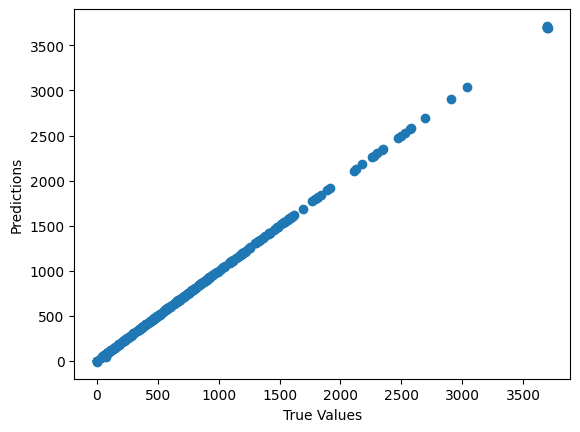

In [14]:
# visualise
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()